## 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('../../ssd_data/combined_by_diskmodel/combined_MA2_preprocessed.csv',index_col=False)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
data

MemoryError: Unable to allocate 3.34 GiB for an array with shape (26, 17217447) and data type float64

In [2]:
# null값이 있는 열을 제거하는 코드
def remove_null_columns(df):
    # null인 컬럼을 확인하고, 모든 값이 null인 컬럼을 찾습니다.
    null_columns = df.columns[df.isnull().all()]
    
    # 모든 값이 null인 컬럼을 DataFrame에서 제거합니다.
    df = df.drop(null_columns, axis=1)
    return df

data = remove_null_columns(data)
data

disk_id        ds model    n_1           r_1   n_5  r_5    n_9  \
0          10045  20190101   MA1  130.0  4.294967e+09  97.0  0.0  100.0   
19059       3614  20190101   MA1  130.0  4.294967e+09  96.0  0.0  100.0   
19058      36107  20190101   MA1  130.0  4.294967e+09  97.0  0.0  100.0   
19057      36104  20190101   MA1  130.0  4.294967e+09  98.0  0.0  100.0   
19056        361  20190101   MA1  130.0  3.276881e+09  95.0  2.0  100.0   
...          ...       ...   ...    ...           ...   ...  ...    ...   
4728266    17784  20190630   MA1  130.0  4.294967e+09  97.0  0.0  100.0   
4728265    17781  20190630   MA1  130.0  4.294967e+09  97.0  0.0  100.0   
4728264    17715  20190630   MA1  130.0  4.294967e+09  96.0  0.0  100.0   
4728273    17929  20190630   MA1  130.0  4.294967e+09  97.0  1.0  100.0   
4744314     9974  20190630   MA1  130.0  4.294967e+09  96.0  0.0  100.0   

             r_9   n_12  ...         r_195  n_196  r_196  r_197  r_198  n_199  \
0        38288.0    NaN  ...           NaN  100.0    0.0    NaN    NaN    NaN   
19059    44475.0  100.0  ...  1.120414e+09  100.0    0.0    0.0    0.0  100.0   
19058    40372.0  100.0  ...  8.552900e+05  100.0    0.0    0.0    0.0  100.0   
19057    40369.0  100.0  ...  1.044777e+06  100.0    0.0    0.0    0.0  100.0   
19056    46646.0  100.0  ...  1.091491e+06   99.0    2.0    0.0    0.0  100.0   
...          ...    ...  ...           ...    ...    ...    ...    ...    ...   
4728266  42460.0    NaN  ...           NaN  100.0    0.0    NaN    NaN    NaN   
4728265  42460.0    NaN  ...           NaN  100.0    0.0    NaN    NaN    NaN   
4728264  40284.0  100.0  ...  8.232852e+06  100.0    0.0    0.0    0.0  100.0   
4728273  49490.0  100.0  ...  4.142201e+08   99.0    1.0    0.0    0.0  100.0   
4744314  46623.0  100.0  ...  3.944694e+08  100.0    0.0    0.0    0.0  100.0   

         r_199  n_175         r_175  label  
0          NaN  100.0  9.752124e+11      0  
19059      0.0  100.0  1.125649e+12      0  
19058      0.0  100.0  1.014122e+12      0  
19057      0.0  100.0  1.014122e+12      0  
19056      0.0  100.0  1.181125e+12      0  
...        ...    ...           ...    ...  
4728266    NaN  100.0  1.074284e+12      0  
4728265    NaN  100.0  1.074284e+12      0  
4728264    0.0  100.0  1.018248e+12      0  
4728273    0.0  100.0  1.241550e+12      0  
4744314    0.0  100.0  1.164486e+12      0  

[4744315 rows x 40 columns]

In [3]:
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_cols.append(col)
    print(single_value_cols)
    df_filtered = df.drop(single_value_cols, axis=1)
    return df_filtered

filtered_data = remove_single_value_columns(data)
filtered_data

['model', 'n_1', 'n_9', 'n_12', 'r_173', 'n_187', 'n_194', 'n_195', 'n_199']


disk_id        ds           r_1   n_5  r_5      r_9  r_12  n_171  \
0          10045  20190101  4.294967e+09  97.0  0.0  38288.0   NaN    NaN   
19059       3614  20190101  4.294967e+09  96.0  0.0  44475.0  26.0  100.0   
19058      36107  20190101  4.294967e+09  97.0  0.0  40372.0  37.0  100.0   
19057      36104  20190101  4.294967e+09  98.0  0.0  40369.0  37.0  100.0   
19056        361  20190101  3.276881e+09  95.0  2.0  46646.0  39.0  100.0   
...          ...       ...           ...   ...  ...      ...   ...    ...   
4728266    17784  20190630  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   
4728265    17781  20190630  4.294967e+09  97.0  0.0  42460.0   NaN    NaN   
4728264    17715  20190630  4.294967e+09  96.0  0.0  40284.0  52.0  100.0   
4728273    17929  20190630  4.294967e+09  97.0  1.0  49490.0  47.0  100.0   
4744314     9974  20190630  4.294967e+09  96.0  0.0  46623.0  44.0  100.0   

         r_171  n_172  ...  r_194         r_195  n_196  r_196  r_197  r_198  \
0          NaN    NaN  ...   12.0           NaN  100.0    0.0    NaN    NaN   
19059      0.0  100.0  ...   11.0  1.120414e+09  100.0    0.0    0.0    0.0   
19058      0.0  100.0  ...   16.0  8.552900e+05  100.0    0.0    0.0    0.0   
19057      0.0  100.0  ...   16.0  1.044777e+06  100.0    0.0    0.0    0.0   
19056      1.0  100.0  ...   16.0  1.091491e+06   99.0    2.0    0.0    0.0   
...        ...    ...  ...    ...           ...    ...    ...    ...    ...   
4728266    NaN    NaN  ...   16.0           NaN  100.0    0.0    NaN    NaN   
4728265    NaN    NaN  ...   15.0           NaN  100.0    0.0    NaN    NaN   
4728264    0.0  100.0  ...   14.0  8.232852e+06  100.0    0.0    0.0    0.0   
4728273    0.0  100.0  ...   14.0  4.142201e+08   99.0    1.0    0.0    0.0   
4744314    0.0  100.0  ...   14.0  3.944694e+08  100.0    0.0    0.0    0.0   

         r_199  n_175         r_175  label  
0          NaN  100.0  9.752124e+11      0  
19059      0.0  100.0  1.125649e+12      0  
19058      0.0  100.0  1.014122e+12      0  
19057      0.0  100.0  1.014122e+12      0  
19056      0.0  100.0  1.181125e+12      0  
...        ...    ...           ...    ...  
4728266    NaN  100.0  1.074284e+12      0  
4728265    NaN  100.0  1.074284e+12      0  
4728264    0.0  100.0  1.018248e+12      0  
4728273    0.0  100.0  1.241550e+12      0  
4744314    0.0  100.0  1.164486e+12      0  

[4744315 rows x 31 columns]

NaN갑과 특정 숫자 하나만 가지는 feature가 존재하는데, 제거하지 않고 일단 남겨놓고 진행

## EDA

In [ ]:
print(data.shape)
nan_stats = data.isnull().sum().sort_values(ascending = False)/data.shape[0]
nan_stats

(4744315, 40)


n_199      0.273984
r_199      0.273984
r_198      0.273983
r_197      0.273983
n_12       0.273983
r_12       0.273983
r_174      0.273982
r_195      0.273982
n_195      0.273982
r_187      0.273981
n_187      0.273981
r_184      0.273981
n_184      0.273981
n_172      0.273980
r_190      0.273980
n_190      0.273980
r_172      0.273980
n_171      0.273980
r_188      0.273980
r_171      0.273980
r_196      0.000040
n_196      0.000040
n_194      0.000038
r_1        0.000038
n_1        0.000038
r_173      0.000038
n_173      0.000038
r_194      0.000038
r_175      0.000038
r_180      0.000038
n_5        0.000038
n_175      0.000038
r_5        0.000038
n_180      0.000038
n_9        0.000038
r_9        0.000038
disk_id    0.000000
ds         0.000000
model      0.000000
label      0.000000
dtype: float64

In [ ]:
features_data = data.drop(columns=['disk_id','ds','model'])
features_info=features_data.describe()

In [ ]:
features_info.iloc[:,:14]

n_1           r_1           n_5           r_5        n_9  \
count  4744133.0  4.744133e+06  4.744135e+06  4.744135e+06  4744137.0   
mean       130.0  4.063660e+09  9.658193e+01  1.237807e+01      100.0   
std          0.0  9.100537e+08  3.447542e+00  1.624807e+02        0.0   
min        130.0  4.550000e+02  1.000000e+00  0.000000e+00      100.0   
25%        130.0  4.294967e+09  9.600000e+01  0.000000e+00      100.0   
50%        130.0  4.294967e+09  9.700000e+01  0.000000e+00      100.0   
75%        130.0  4.294967e+09  9.800000e+01  0.000000e+00      100.0   
max        130.0  4.294967e+10  9.800000e+01  6.574000e+03      100.0   

                r_9       n_12          r_12         n_171         r_171  \
count  4.744137e+06  3444455.0  3.444455e+06  3.444469e+06  3.444469e+06   
mean   4.174709e+04      100.0  4.243925e+01  9.996780e+01  4.964246e+00   
std    5.536795e+03        0.0  5.491130e+01  1.474926e+00  3.305743e+02   
min    3.143000e+03      100.0  4.000000e+00  1.000000e+00  0.000000e+00   
25%    3.980900e+04      100.0  3.200000e+01  1.000000e+02  0.000000e+00   
50%    4.167800e+04      100.0  3.700000e+01  1.000000e+02  0.000000e+00   
75%    4.445600e+04      100.0  4.500000e+01  1.000000e+02  0.000000e+00   
max    5.160900e+04      100.0  1.547000e+03  1.000000e+02  3.900500e+04   

              n_172         r_172         n_173      r_173  
count  3.444468e+06  3.444468e+06  4.744133e+06  4744133.0  
mean   9.999734e+01  1.228047e-01  7.403667e+01        0.0  
std    1.791820e-01  7.432831e+00  2.645398e+01        0.0  
min    8.700000e+01  0.000000e+00  1.000000e+00        0.0  
25%    1.000000e+02  0.000000e+00  6.100000e+01        0.0  
50%    1.000000e+02  0.000000e+00  8.600000e+01        0.0  
75%    1.000000e+02  0.000000e+00  9.400000e+01        0.0  
max    1.000000e+02  5.120000e+02  1.000000e+02        0.0

In [7]:
features_info.iloc[:,14:28]

r_174         n_180         r_180         n_184         r_184  \
count  3.444459e+06  4.744135e+06  4.744135e+06  3.444465e+06  3.444465e+06   
mean   4.015598e+01  1.299874e+02  4.028024e+10  9.998690e+01  2.738769e+03   
std    5.490240e+01  6.900533e-01  2.315334e+12  1.136533e+00  5.187394e+05   
min    2.000000e+00  5.800000e+01  5.340000e+02  1.000000e+00  0.000000e+00   
25%    2.900000e+01  1.300000e+02  4.294967e+09  1.000000e+02  0.000000e+00   
50%    3.400000e+01  1.300000e+02  4.294967e+09  1.000000e+02  0.000000e+00   
75%    4.300000e+01  1.300000e+02  4.294967e+09  1.000000e+02  0.000000e+00   
max    1.544000e+03  1.300000e+02  2.808178e+14  1.000000e+02  9.826084e+07   

           n_187         r_187         r_188         n_190         r_190  \
count  3444464.0  3.444464e+06  3.444469e+06  3.444468e+06  3.444468e+06   
mean       100.0  2.586760e-04  2.748993e+03  8.492586e+01  1.507409e+01   
std          0.0  4.824953e-02  5.187395e+05  2.343267e+00  2.343276e+00   
min        100.0  0.000000e+00  0.000000e+00  6.500000e+01  6.000000e+00   
25%        100.0  0.000000e+00  0.000000e+00  8.400000e+01  1.400000e+01   
50%        100.0  0.000000e+00  0.000000e+00  8.500000e+01  1.500000e+01   
75%        100.0  0.000000e+00  0.000000e+00  8.600000e+01  1.600000e+01   
max        100.0  9.000000e+00  9.826090e+07  9.400000e+01  3.500000e+01   

           n_194         r_194      n_195         r_195  
count  4744133.0  4.744133e+06  3444459.0  3.444459e+06  
mean       100.0  1.512052e+01      100.0  4.361046e+08  
std          0.0  2.414965e+00        0.0  6.151288e+08  
min        100.0  6.000000e+00      100.0  1.665700e+04  
25%        100.0  1.400000e+01      100.0  1.212292e+07  
50%        100.0  1.500000e+01      100.0  1.347381e+08  
75%        100.0  1.600000e+01      100.0  6.719806e+08  
max        100.0  3.500000e+01      100.0  4.294929e+09

In [8]:
features_info.iloc[:,28:]

n_196         r_196         r_197         r_198      n_199  \
count  4.744124e+06  4.744124e+06  3.444453e+06  3.444453e+06  3444449.0   
mean   9.968690e+01  1.237767e+01  1.307000e-02  3.205734e-02      100.0   
std    2.773435e+00  1.624782e+02  8.793292e-01  2.310285e+00        0.0   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      100.0   
25%    1.000000e+02  0.000000e+00  0.000000e+00  0.000000e+00      100.0   
50%    1.000000e+02  0.000000e+00  0.000000e+00  0.000000e+00      100.0   
75%    1.000000e+02  0.000000e+00  0.000000e+00  0.000000e+00      100.0   
max    1.000000e+02  6.574000e+03  1.605000e+03  2.860000e+02      100.0   

              r_199         n_175         r_175         label  
count  3.444449e+06  4.744135e+06  4.744135e+06  4.744315e+06  
mean   7.597772e+01  9.952492e+01  1.054925e+12  5.796411e-05  
std    4.166093e+03  6.841566e+00  1.406102e+11  7.613197e-03  
min    0.000000e+00  1.000000e+00  8.175059e+10  0.000000e+00  
25%    0.000000e+00  1.000000e+02  1.005449e+12  0.000000e+00  
50%    0.000000e+00  1.000000e+02  1.052659e+12  0.000000e+00  
75%    0.000000e+00  1.000000e+02  1.125448e+12  0.000000e+00  
max    6.131280e+05  1.000000e+02  1.318835e+12  1.000000e+00

<AxesSubplot:>

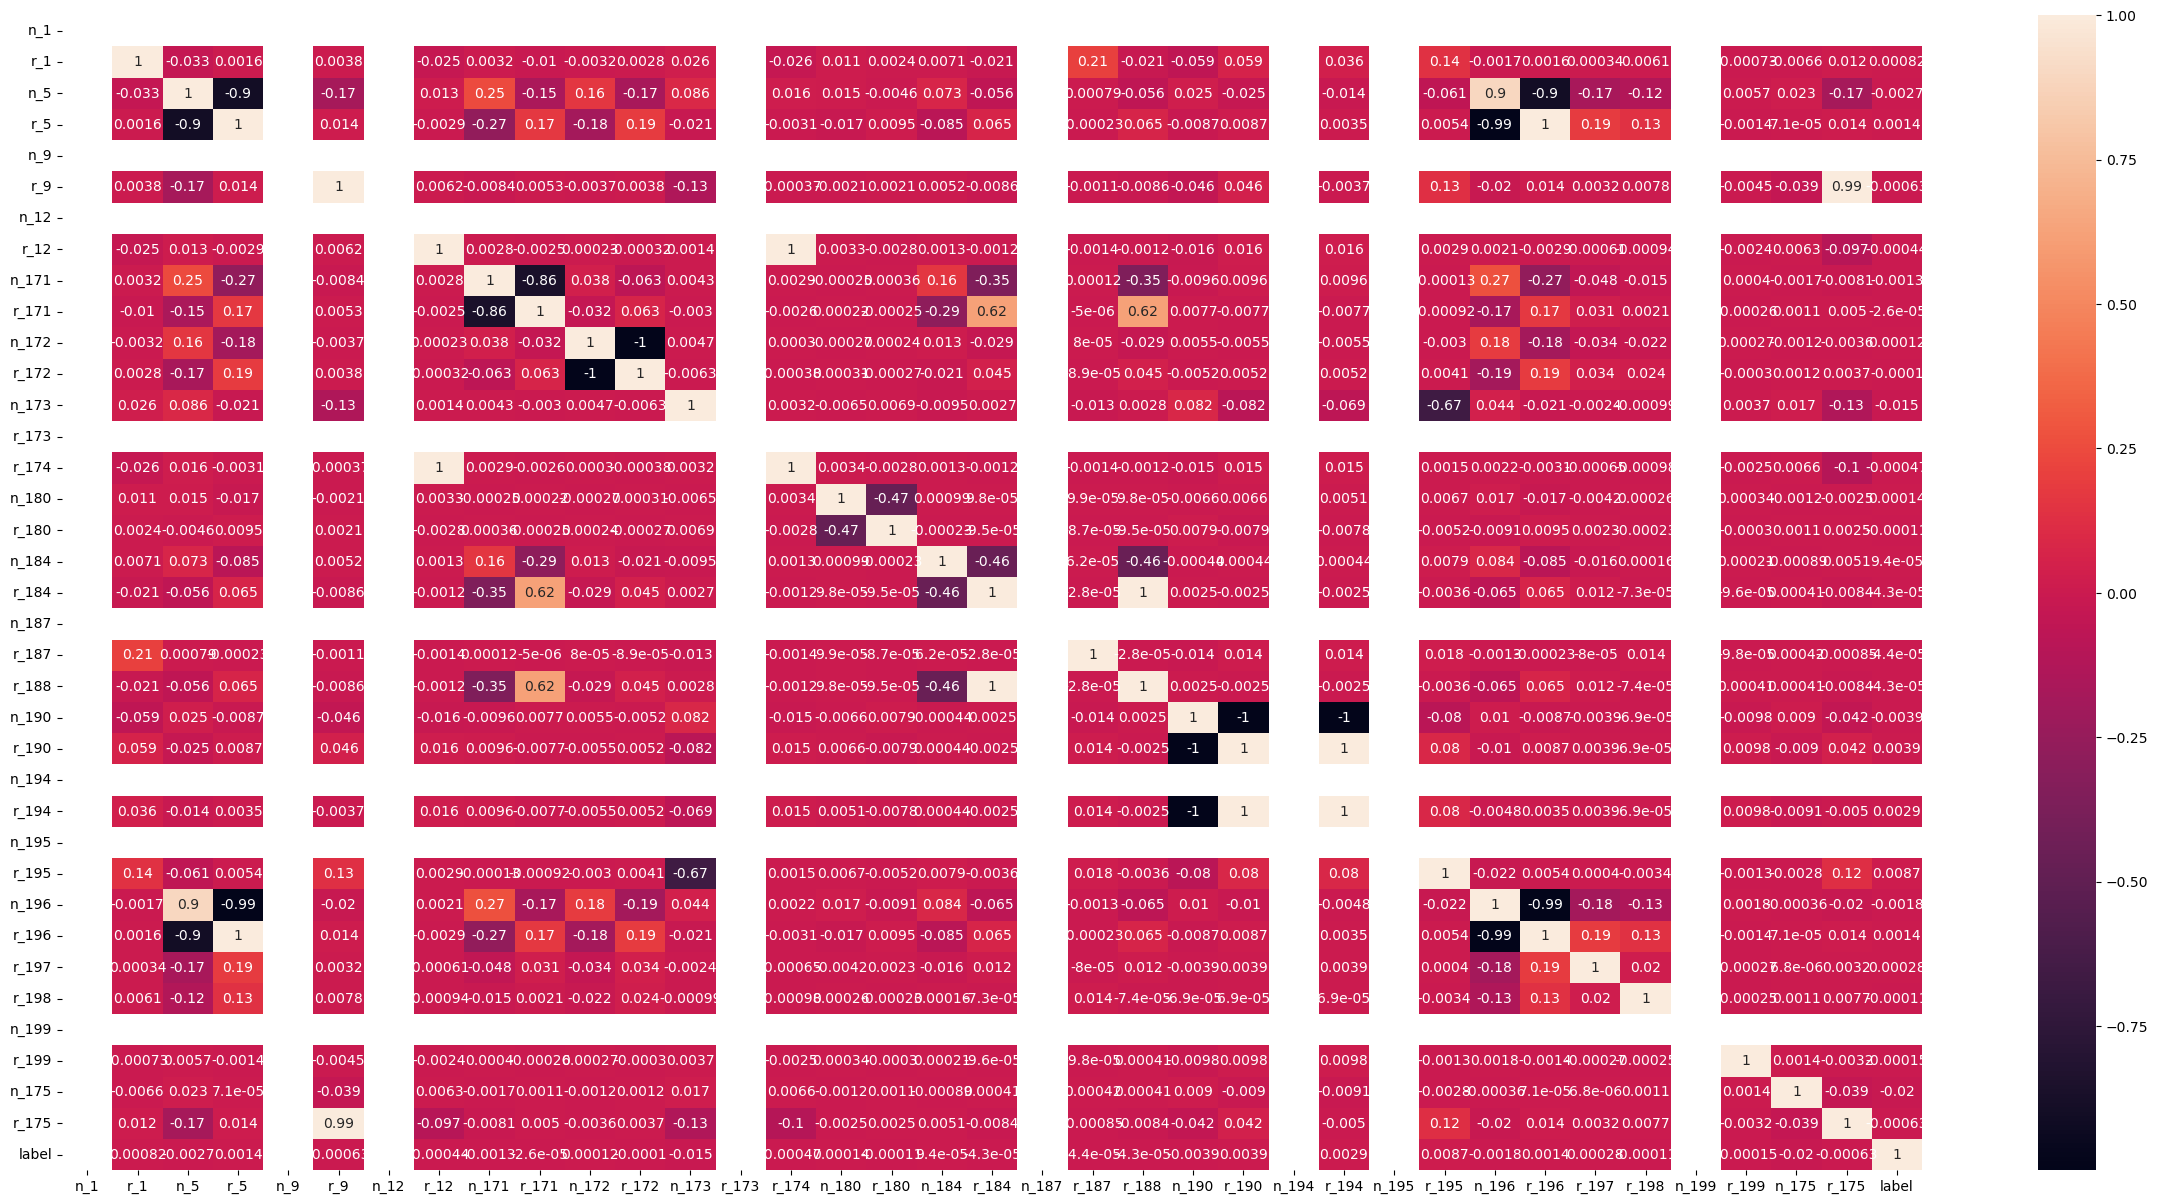

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt # seaborn figure 크기 조절을 위해서
corr = features_data.corr()
plt.figure(figsize=(30, 15)) 
sns.heatmap(corr, annot=True)

In [10]:
# 상관계수의 절대값이 0.4 이상인 셀만 선택
corr_np = np.abs(corr.values)
mask = corr_np > 0.4

# 선택한 셀의 행렬에서 대각선을 제거(자기 자신과의 상관계수는 항상 1)
mask[np.triu_indices_from(mask, k=1)] = False

# 마스크 적용
high_corr = corr_np[mask]

# 해당하는 feature 쌍 print
high_corr_pairs = []
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] and i != j:  # 추가된 부분: i와 j가 같지 않을 때만 추가
            high_corr_pairs.append((corr.columns[i], corr.columns[j]))

print(high_corr_pairs)

[('r_5', 'n_5'), ('r_171', 'n_171'), ('r_172', 'n_172'), ('r_174', 'r_12'), ('r_180', 'n_180'), ('r_184', 'r_171'), ('r_184', 'n_184'), ('r_188', 'r_171'), ('r_188', 'n_184'), ('r_188', 'r_184'), ('r_190', 'n_190'), ('r_194', 'n_190'), ('r_194', 'r_190'), ('r_195', 'n_173'), ('n_196', 'n_5'), ('n_196', 'r_5'), ('r_196', 'n_5'), ('r_196', 'r_5'), ('r_196', 'n_196'), ('r_175', 'r_9')]


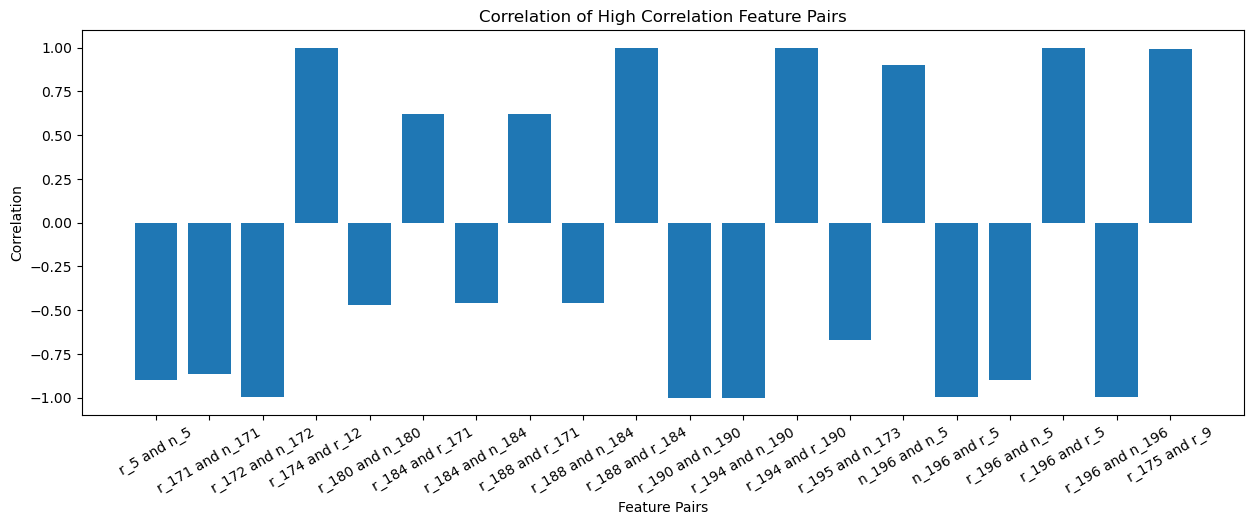

In [11]:
import matplotlib.pyplot as plt

# 상관계수 값 가져오기
high_corr_values = [corr.loc[pair] for pair in high_corr_pairs]

# 특성 쌍 이름 가져오기
pair_names = [f"{pair[0]} and {pair[1]}" for pair in high_corr_pairs]

# bar plot 그리기
plt.figure(figsize=(15, 5))
plt.bar(pair_names, high_corr_values)
plt.xlabel('Feature Pairs')
plt.ylabel('Correlation')
plt.title('Correlation of High Correlation Feature Pairs')
plt.xticks(rotation=30)
plt.show()

## About healthy data

#### label = 0 인 데이터 중, 랜덤으로 3개에 대해서 feature plot 그려보기

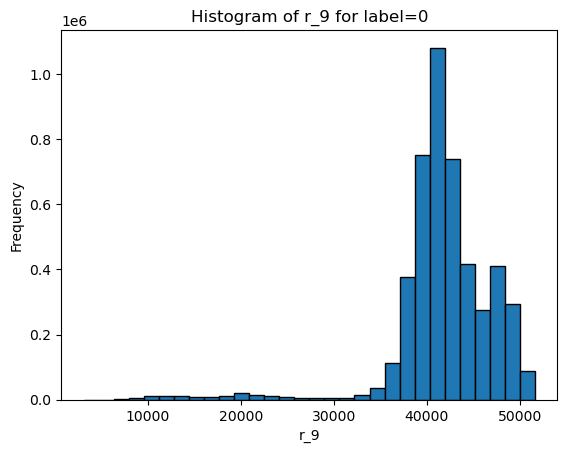

In [30]:
import matplotlib.pyplot as plt

# label이 1인 데이터의 r_9 히스토그램 그리기
plt.hist(data[data['label'] == 0]['r_9'], bins=30, edgecolor='k')

# 히스토그램 제목과 축 레이블 설정
plt.title("Histogram of r_9 for label=0")
plt.xlabel("r_9")
plt.ylabel("Frequency")

# 그래프 출력
plt.show()

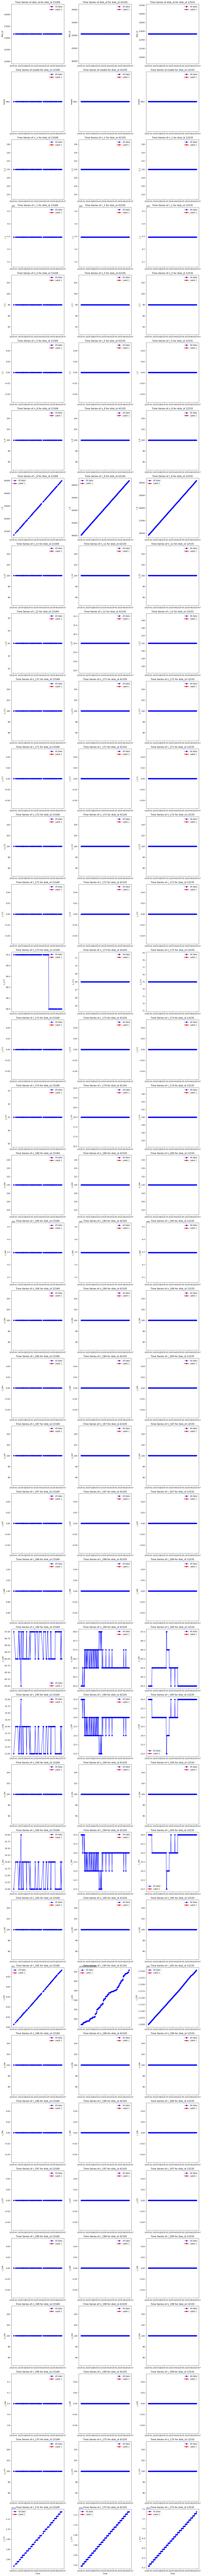

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# label=1인 disk_id 선택
disk_ids = data[data["label"]==0]['disk_id'].unique()

# disk_ids 중에서 임의로 3개 선택
selected_disk_ids = np.random.choice(disk_ids, size=3, replace=False)

# ds와 label 열을 제외한 모든 열에 대해
features = data.drop(['ds', 'label'], axis=1).columns

# 행의 수는 특징의 수, 열의 수는 disk_id의 수
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]

    # disk를 시간 순서대로 정렬
    disk = disk.sort_values('ds')

    # ds 열을 datetime으로 변환
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')

    # ds를 인덱스로 설정
    disk.set_index('ds', inplace=True)

    # label이 1인 데이터
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        # 모든 데이터 그리기
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')

        # label이 1인 데이터 빨간색으로 강조하여 그리기
        # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

# x축 라벨 설정은 마지막 행에 대해서만 수행
for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

#### label = 0 인 데이터 중, r_9값이 작은순서대로 3개에 대해서 feature plot 그려보기

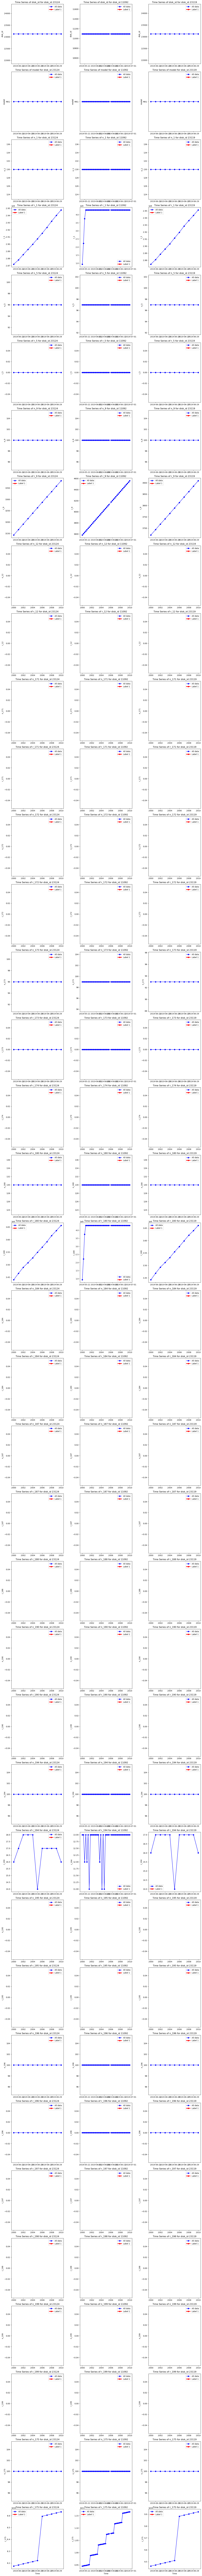

In [13]:
# label = 0인 disk_id 선택
disk_ids = data[data["label"]==0]['disk_id'].unique()

# 'r_9' 변수가 가장 작은 disk_id 선택
sorted_disk_ids = data[data['disk_id'].isin(disk_ids)].groupby('disk_id')['r_9'].min().sort_values()

# 가장 작은 'r_9' 값을 가진 3개의 disk_id 선택
selected_disk_ids = sorted_disk_ids.head(3).index

# 나머지 코드는 동일하게 실행
features = data.drop(['ds', 'label'], axis=1).columns
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]
    disk = disk.sort_values('ds')
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')
    disk.set_index('ds', inplace=True)
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')
        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

In [31]:
data[data['disk_id']==23124]

disk_id        ds model    n_1           r_1   n_5  r_5    n_9  \
4484867    23124  20190620   MA1  130.0  2.872113e+09  96.0  0.0  100.0   
4505334    23124  20190621   MA1  130.0  2.878099e+09  96.0  0.0  100.0   
4545809    23124  20190622   MA1  130.0  2.885523e+09  96.0  0.0  100.0   
4564405    23124  20190623   MA1  130.0  2.892586e+09  96.0  0.0  100.0   
4589530    23124  20190624   MA1  130.0  2.899755e+09  96.0  0.0  100.0   
4622674    23124  20190625   MA1  130.0  2.907398e+09  96.0  0.0  100.0   
4630276    23124  20190626   MA1  130.0  2.915105e+09  96.0  0.0  100.0   
4658814    23124  20190627   MA1  130.0  2.923295e+09  96.0  0.0  100.0   
4679281    23124  20190628   MA1  130.0  2.931983e+09  96.0  0.0  100.0   
4714145    23124  20190629   MA1  130.0  2.940011e+09  96.0  0.0  100.0   
4742543    23124  20190630   MA1  130.0  2.947649e+09  96.0  0.0  100.0   

            r_9  n_12  ...  r_195  n_196  r_196  r_197  r_198  n_199  r_199  \
4484867  3143.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   
4505334  3167.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   
4545809  3191.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   
4564405  3215.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   
4589530  3239.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   
4622674  3263.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   
4630276  3287.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   
4658814  3311.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   
4679281  3334.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   
4714145  3358.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   
4742543  3382.0   NaN  ...    NaN  100.0    0.0    NaN    NaN    NaN    NaN   

         n_175         r_175  label  
4484867  100.0  8.175059e+10      0  
4505334  100.0  8.184444e+10      0  
4545809  100.0  8.193835e+10      0  
4564405  100.0  8.203226e+10      0  
4589530  100.0  8.212618e+10      0  
4622674  100.0  8.222002e+10      0  
4630276  100.0  8.594830e+10      0  
4658814  100.0  8.604222e+10      0  
4679281  100.0  8.613613e+10      0  
4714145  100.0  8.623004e+10      0  
4742543  100.0  8.632389e+10      0  

[11 rows x 40 columns]

데이터 값은 20190528에 처음 나타나고, r_9값도 이때 0부터 시작

## About Failed data

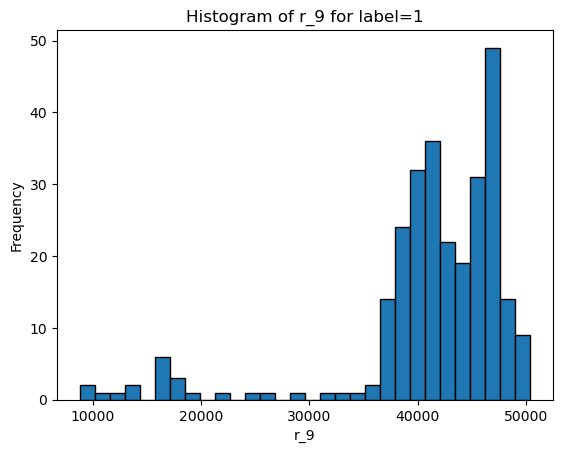

In [15]:
import matplotlib.pyplot as plt

# label이 1인 데이터의 r_9 히스토그램 그리기
plt.hist(data[data['label'] == 1]['r_9'], bins=30, edgecolor='k')

# 히스토그램 제목과 축 레이블 설정
plt.title("Histogram of r_9 for label=1")
plt.xlabel("r_9")
plt.ylabel("Frequency")

# 그래프 출력
plt.show()

MB2에서는 초기 고장은 잘 안나는듯하다.

#### label = 1 인 데이터 중, 랜덤으로 3개에 대해서 feature plot 그려보기

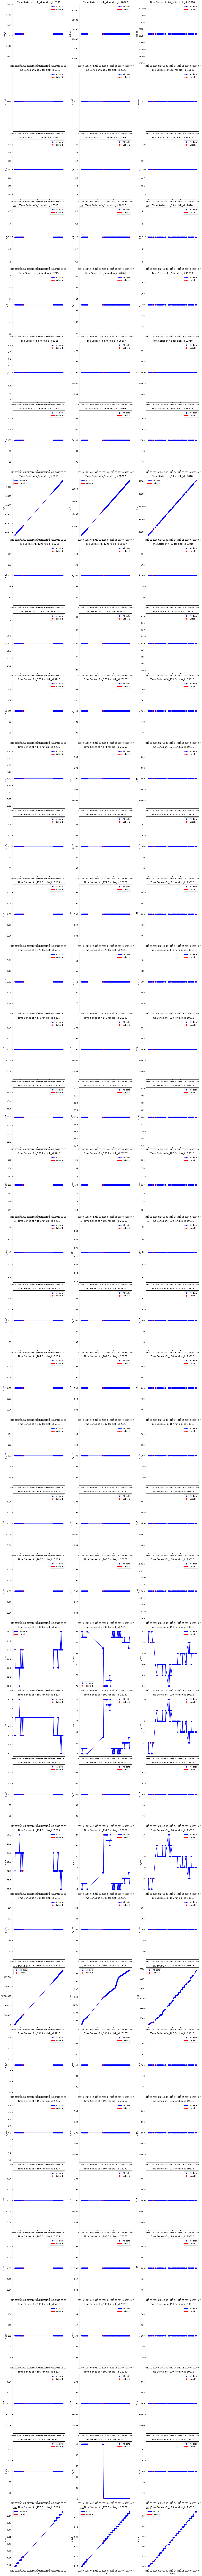

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# label=1인 disk_id 선택
disk_ids = data[data["label"]==1]['disk_id'].unique()

# disk_ids 중에서 임의로 3개 선택
selected_disk_ids = np.random.choice(disk_ids, size=3, replace=False)

# ds와 label 열을 제외한 모든 열에 대해
features = data.drop(['ds', 'label'], axis=1).columns

# 행의 수는 특징의 수, 열의 수는 disk_id의 수
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]

    # disk를 시간 순서대로 정렬
    disk = disk.sort_values('ds')

    # ds 열을 datetime으로 변환
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')

    # ds를 인덱스로 설정
    disk.set_index('ds', inplace=True)

    # label이 1인 데이터
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        # 모든 데이터 그리기
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')

        # label이 1인 데이터 빨간색으로 강조하여 그리기
        # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

# x축 라벨 설정은 마지막 행에 대해서만 수행
for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

### label = 1 인 데이터 중, r_9값이 작은 순서대로 3개 feature plot 그려보기

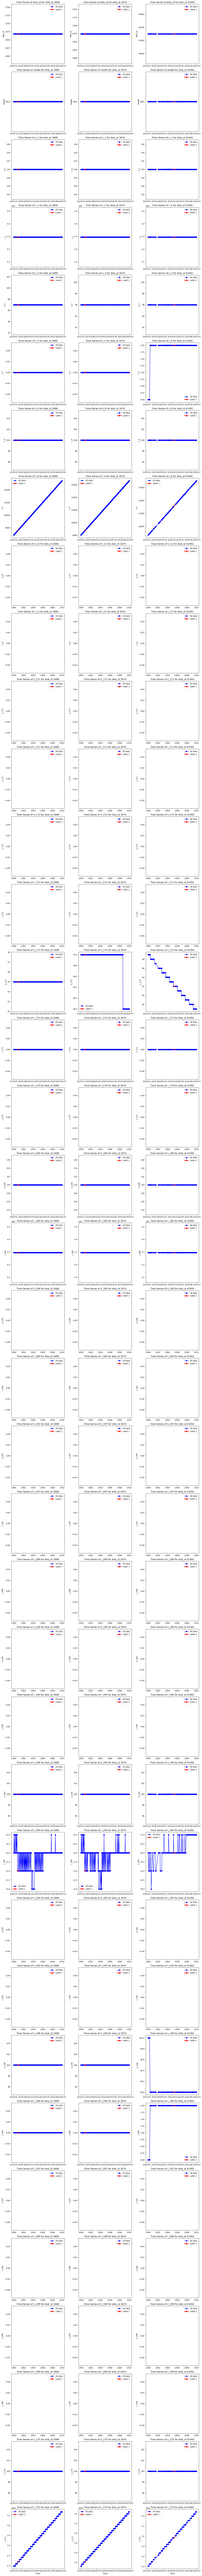

In [17]:
# label=1인 disk_id 선택
disk_ids = data[data["label"]==1]['disk_id'].unique()

# 'r_9' 변수가 가장 작은 disk_id 선택
sorted_disk_ids = data[data['disk_id'].isin(disk_ids)].groupby('disk_id')['r_9'].min().sort_values()

# 가장 작은 'r_9' 값을 가진 3개의 disk_id 선택
selected_disk_ids = sorted_disk_ids.head(3).index

# 나머지 코드는 동일하게 실행
features = data.drop(['ds', 'label'], axis=1).columns
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]
    disk = disk.sort_values('ds')
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')
    disk.set_index('ds', inplace=True)
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')
        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

## healthy VS failed 각 feature별 히스토그램

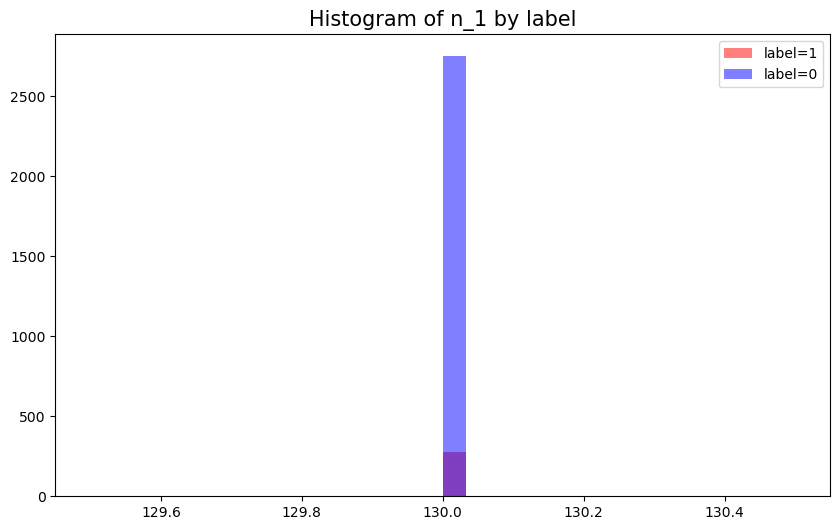

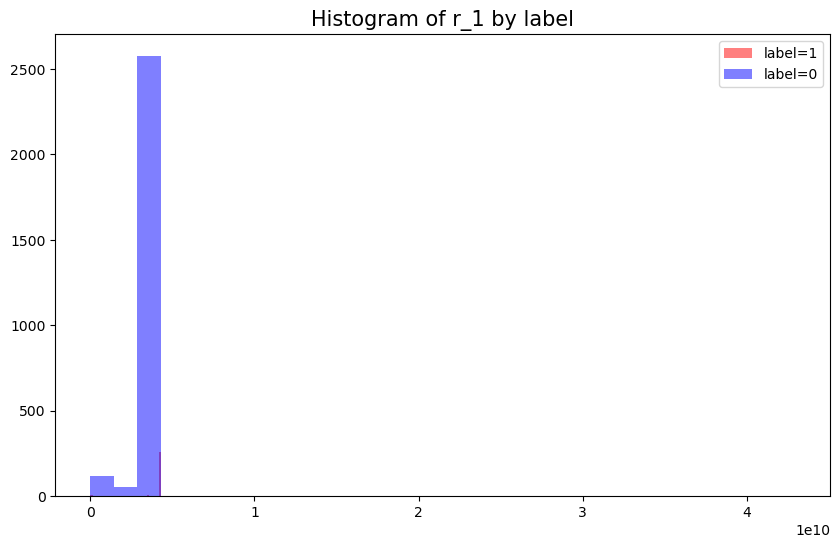

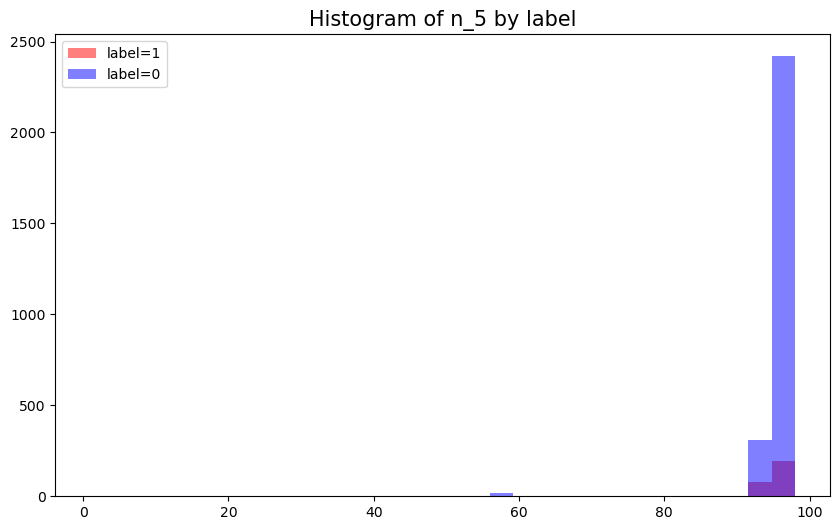

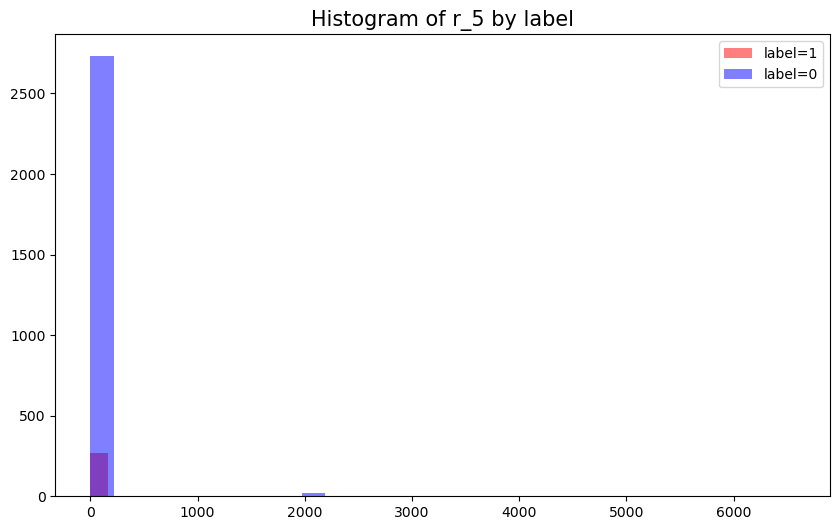

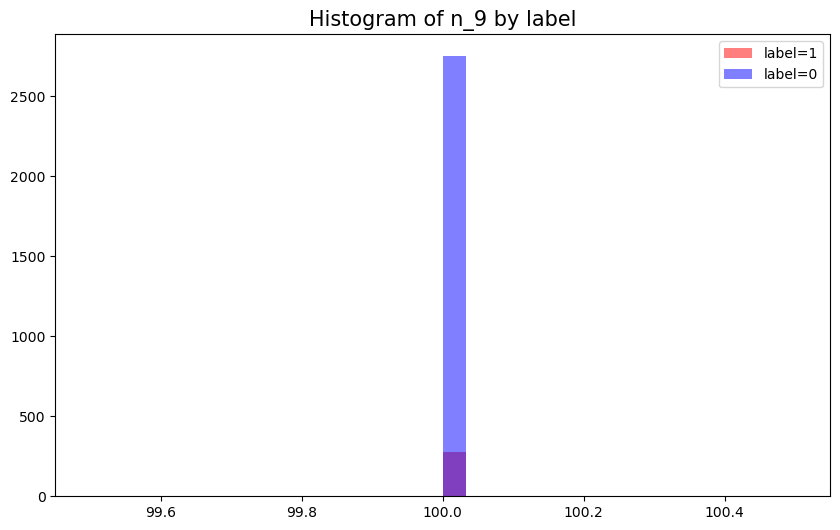

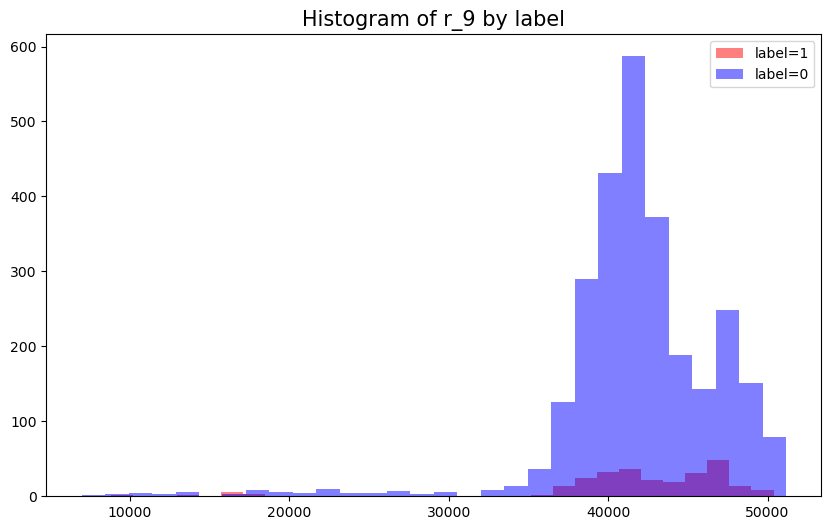

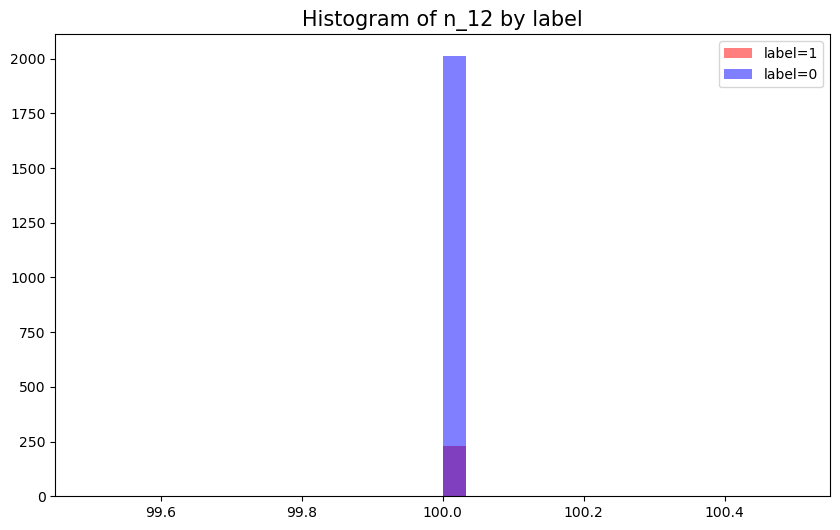

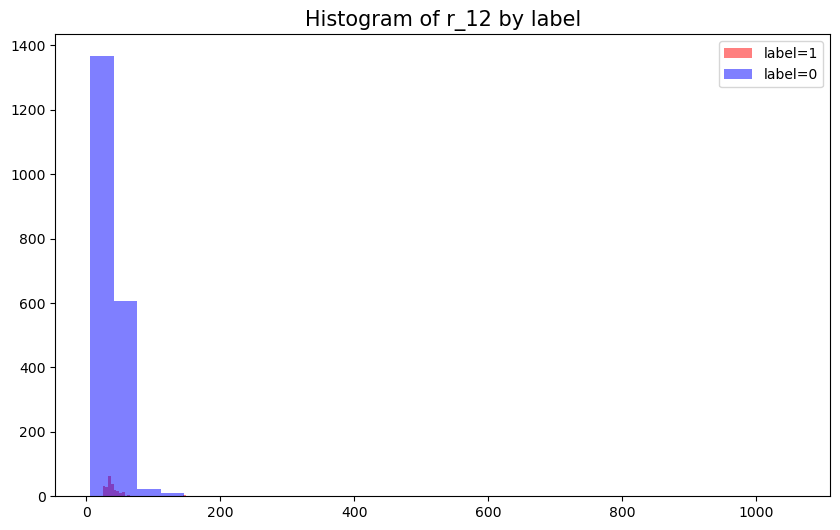

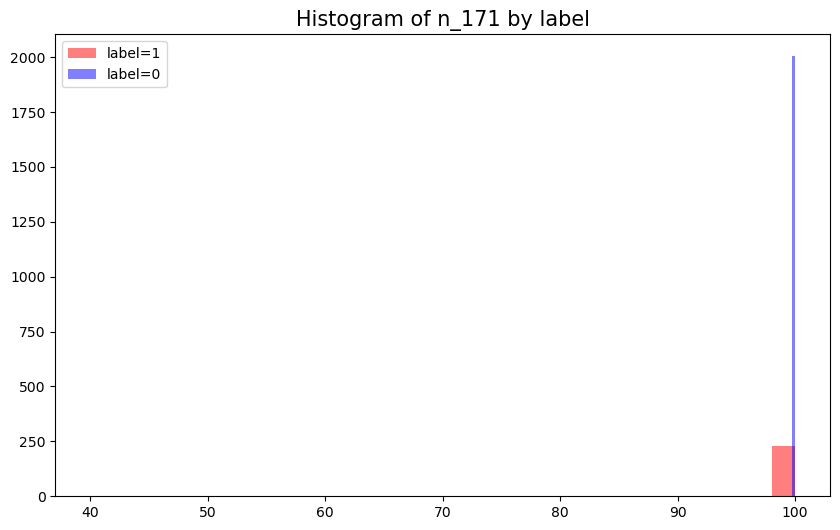

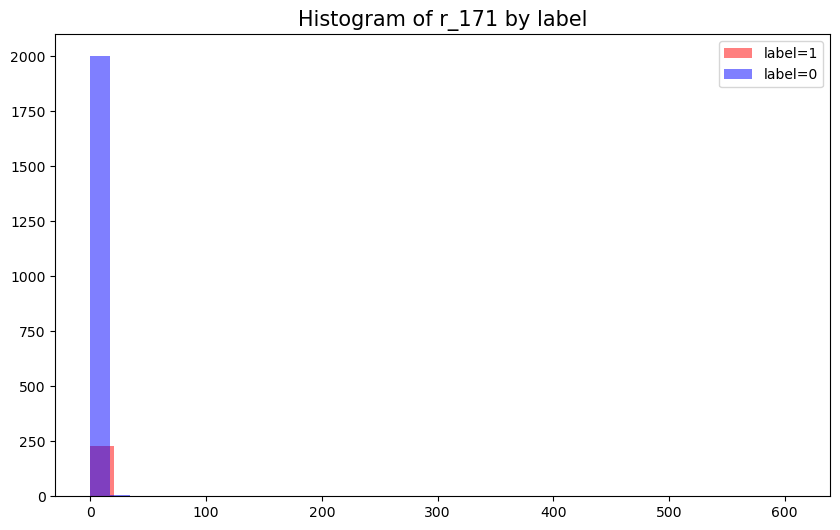

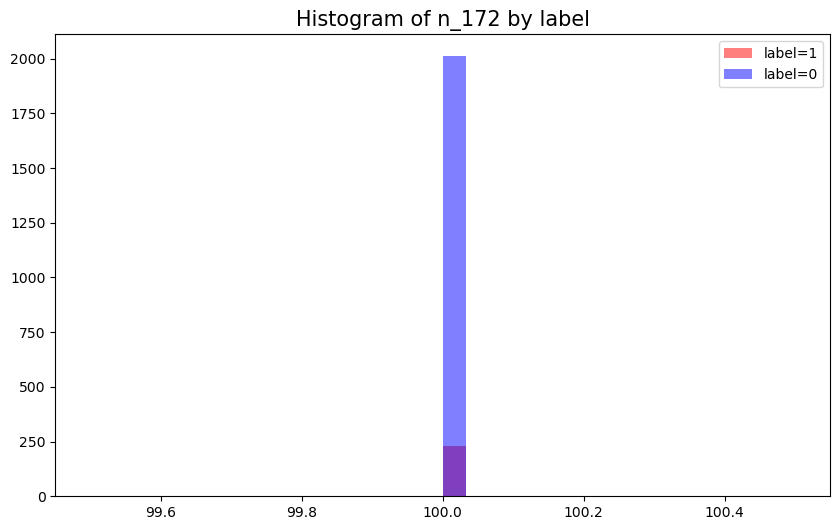

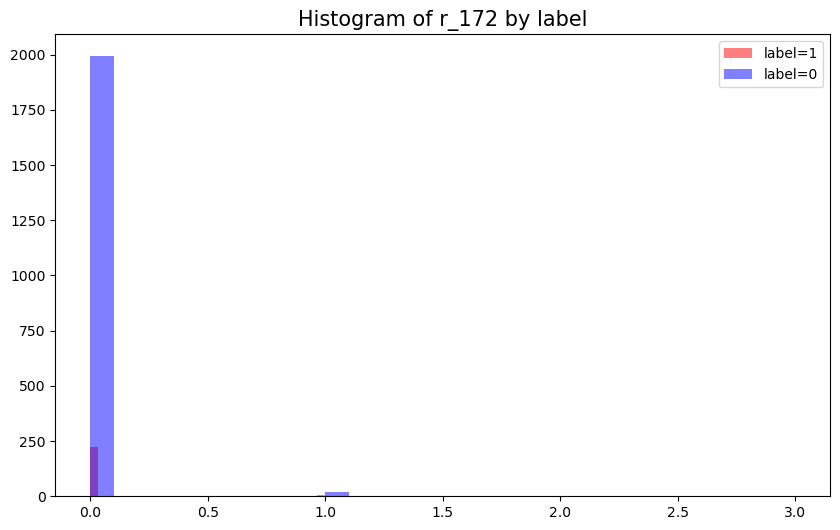

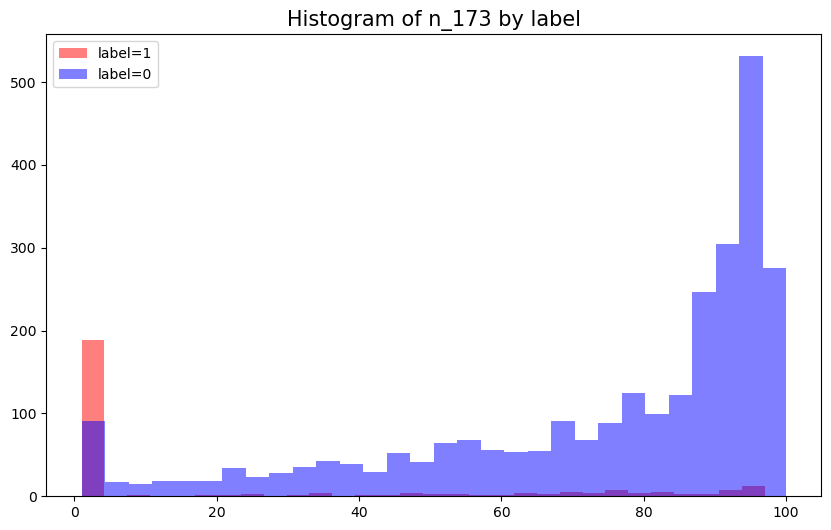

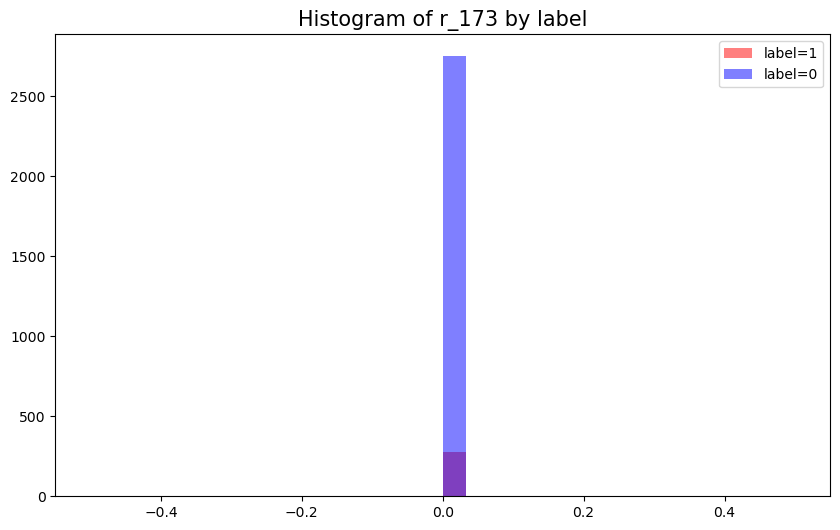

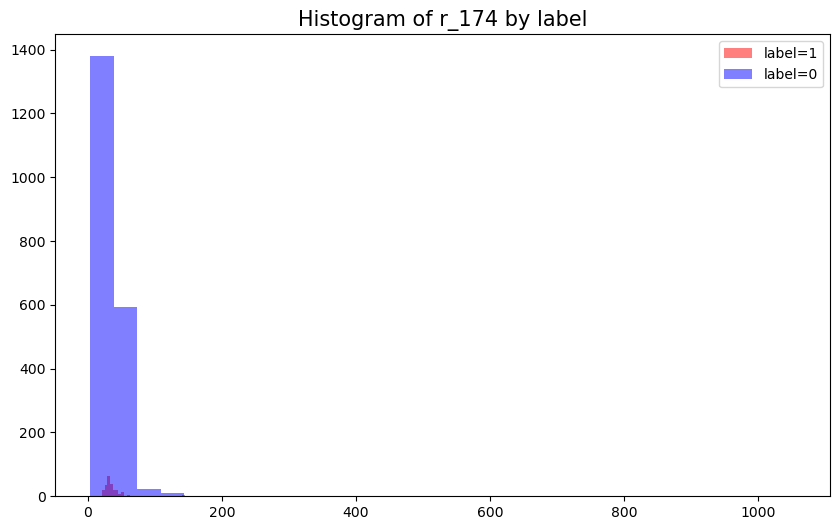

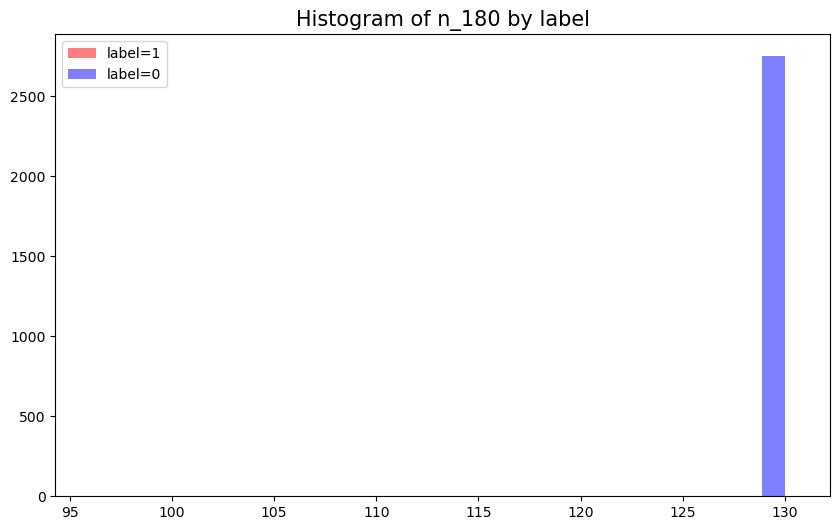

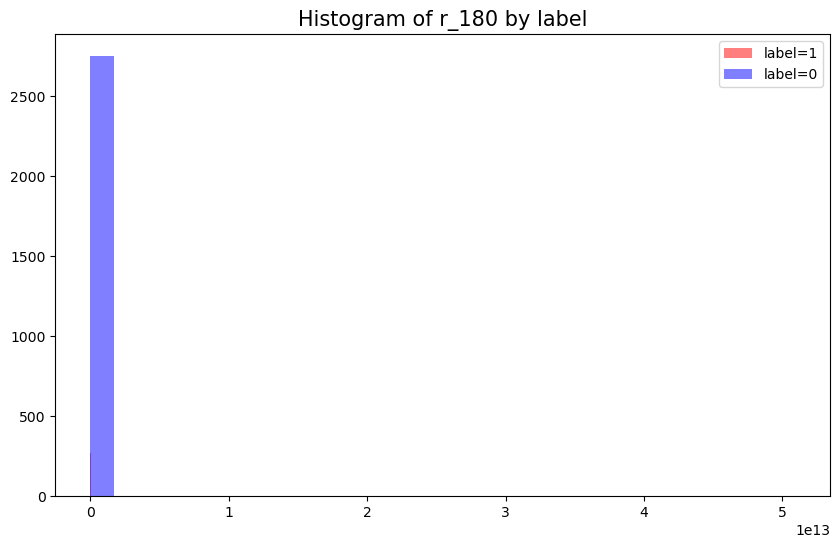

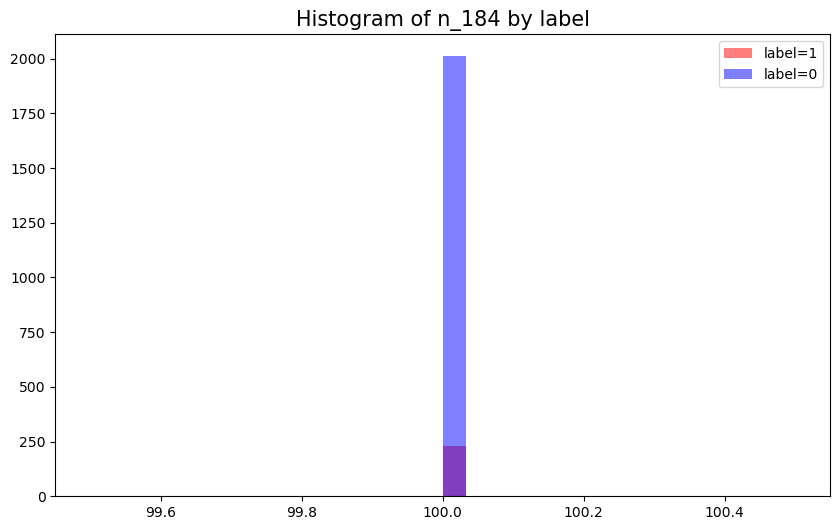

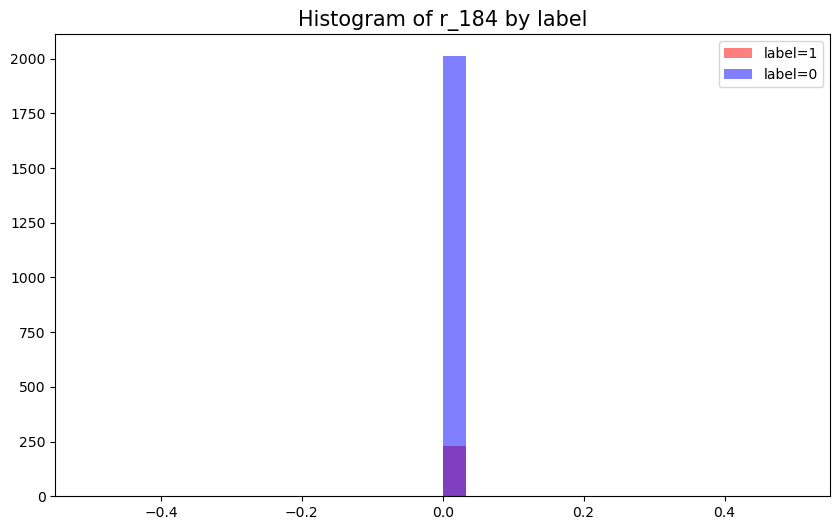

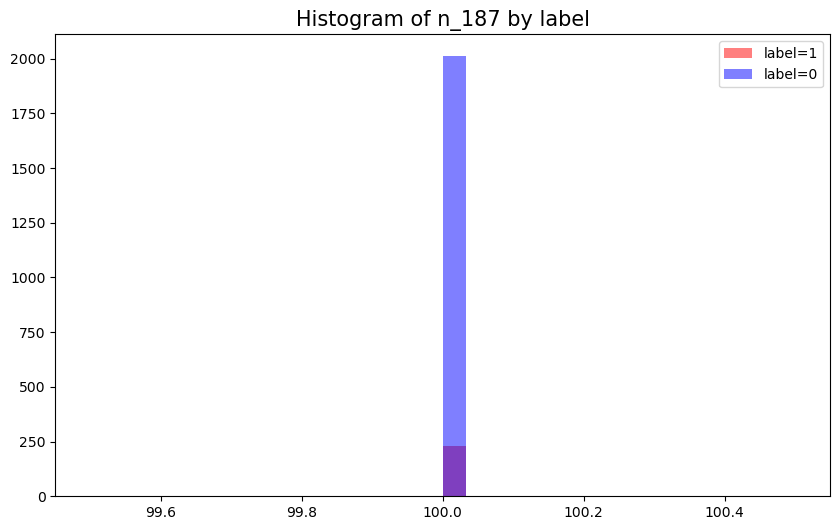

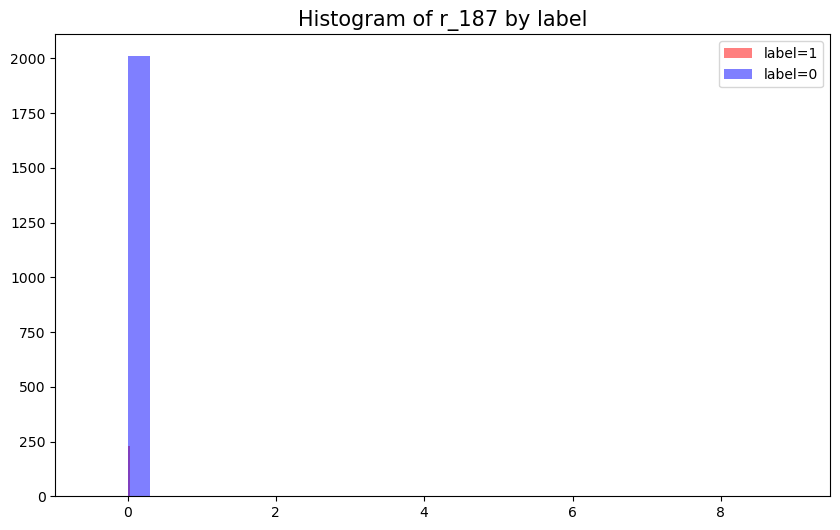

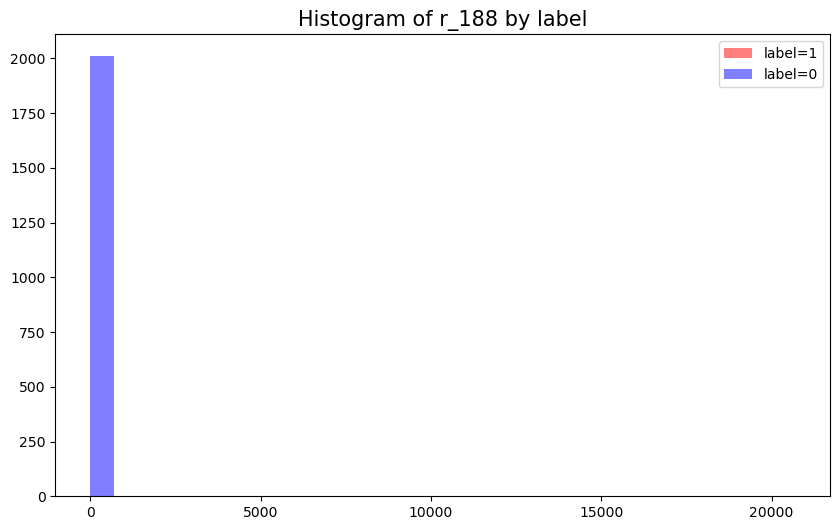

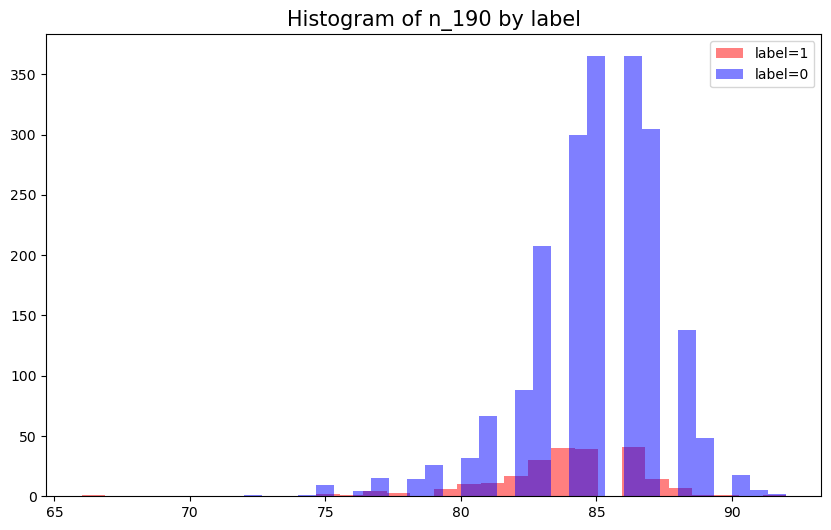

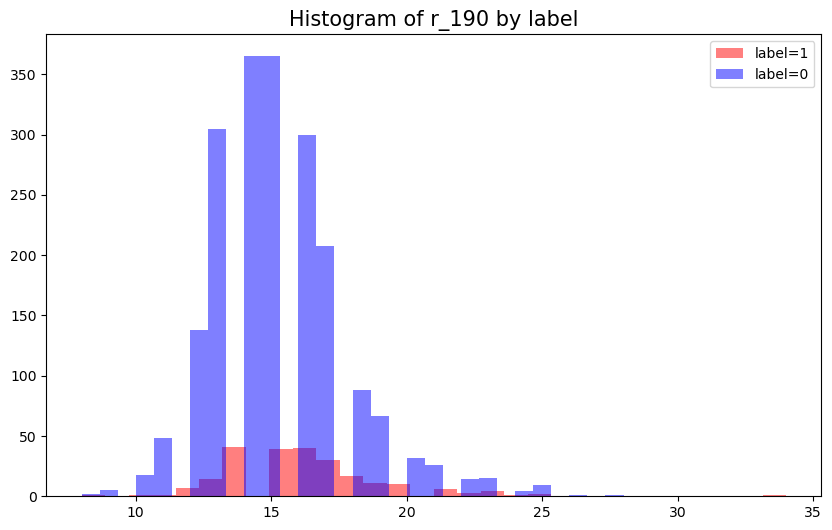

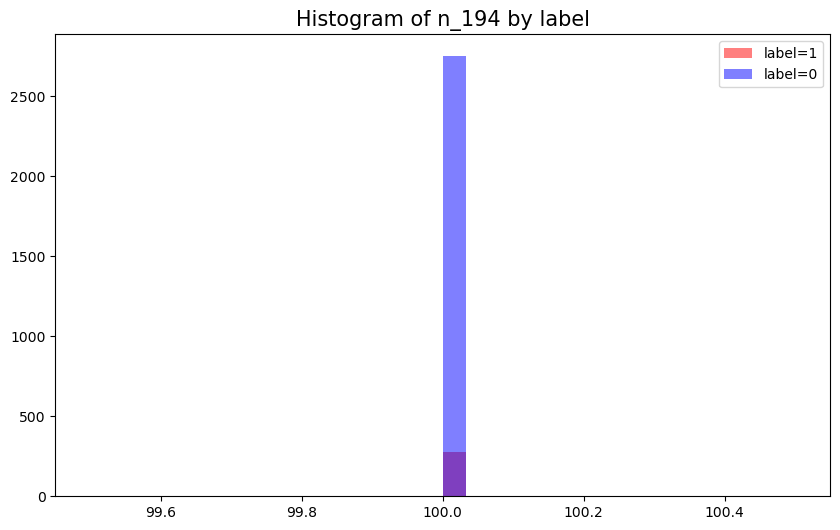

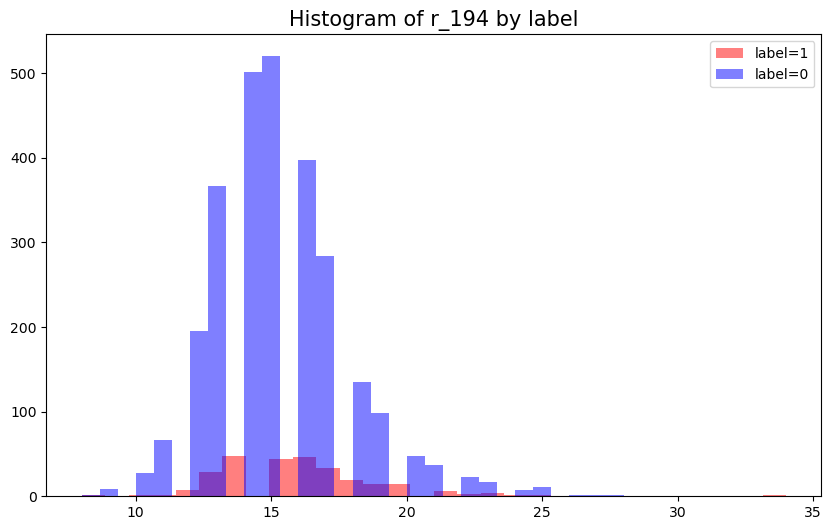

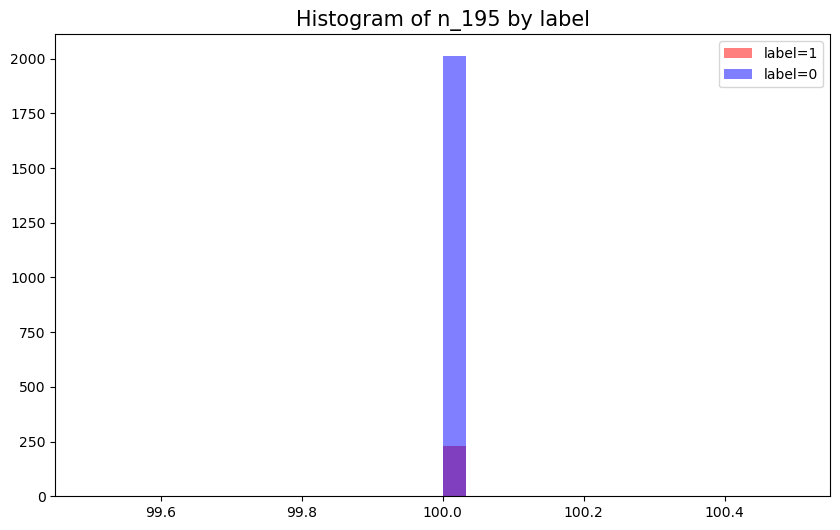

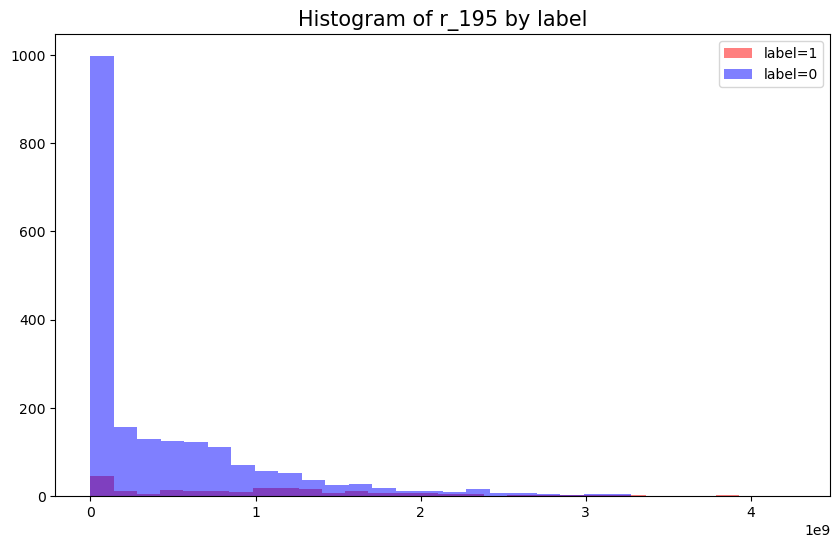

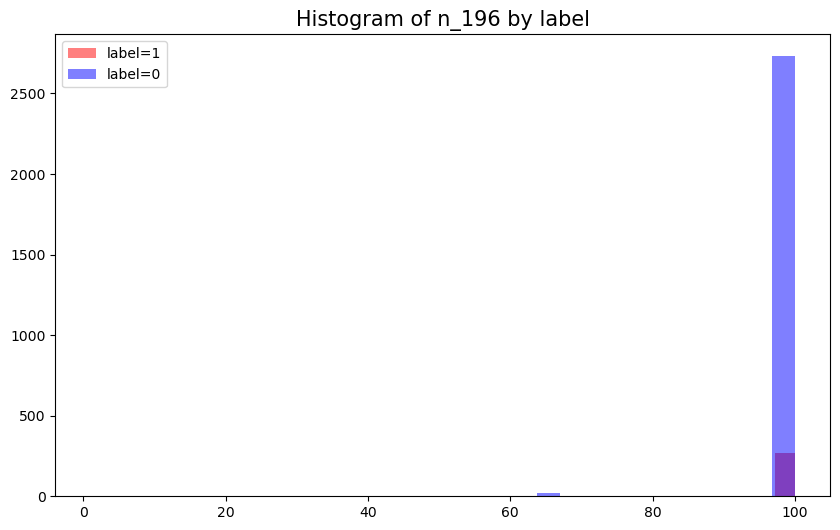

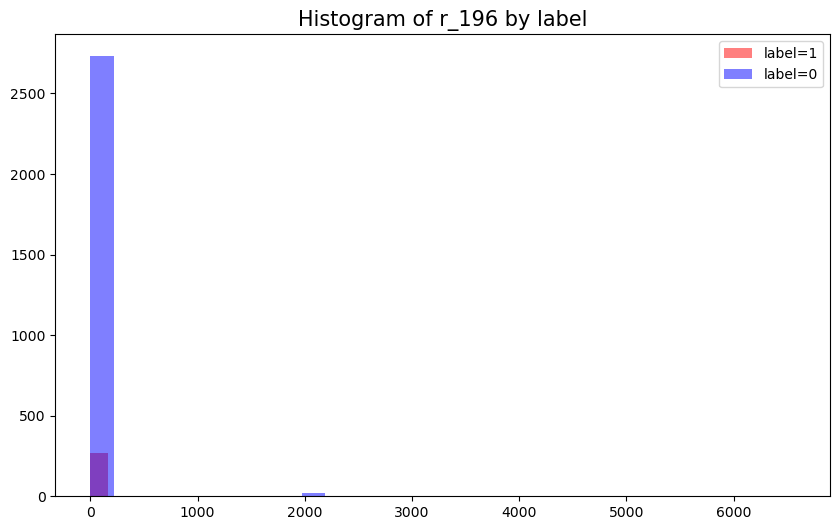

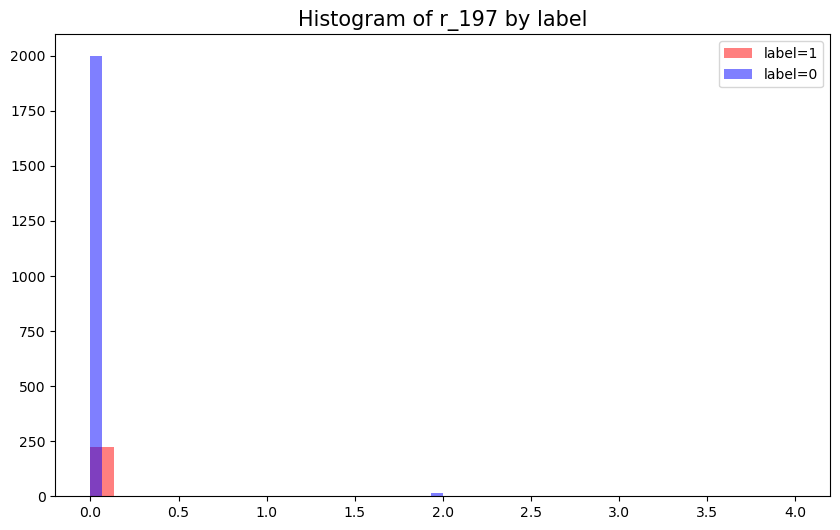

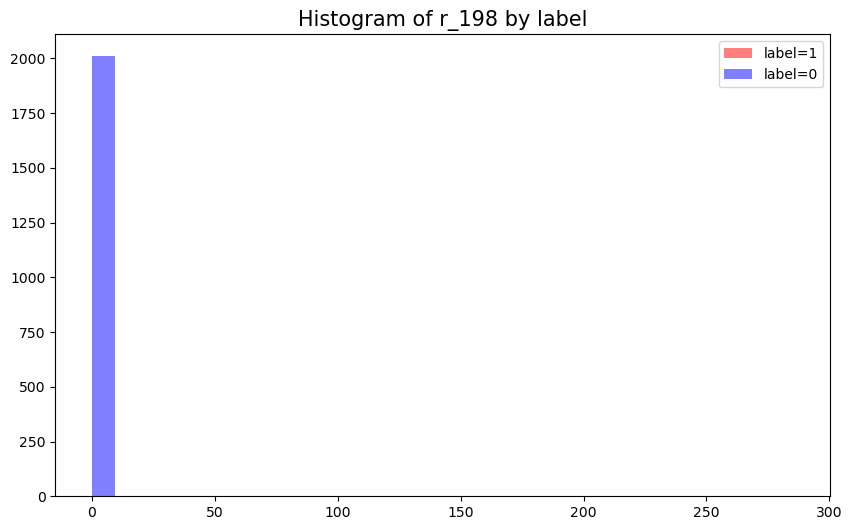

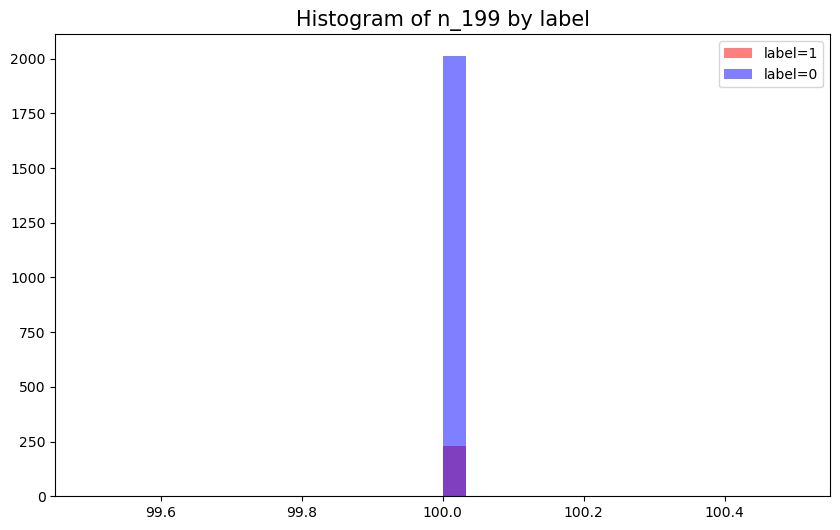

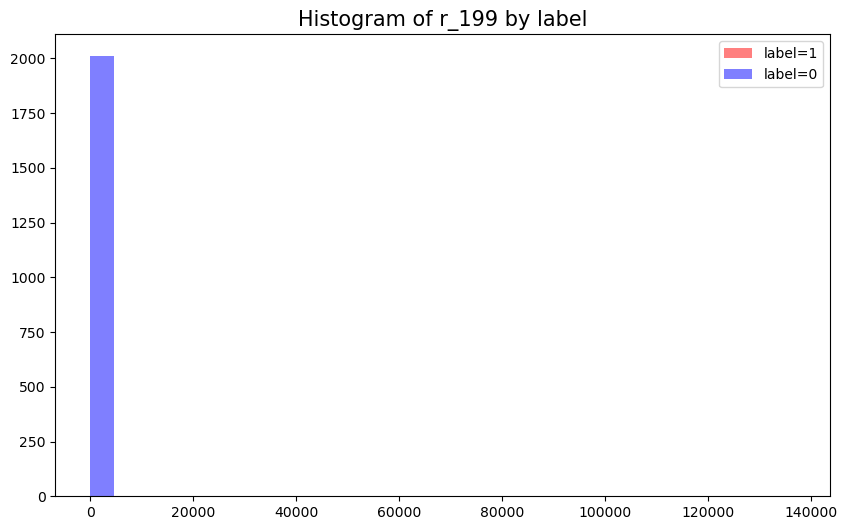

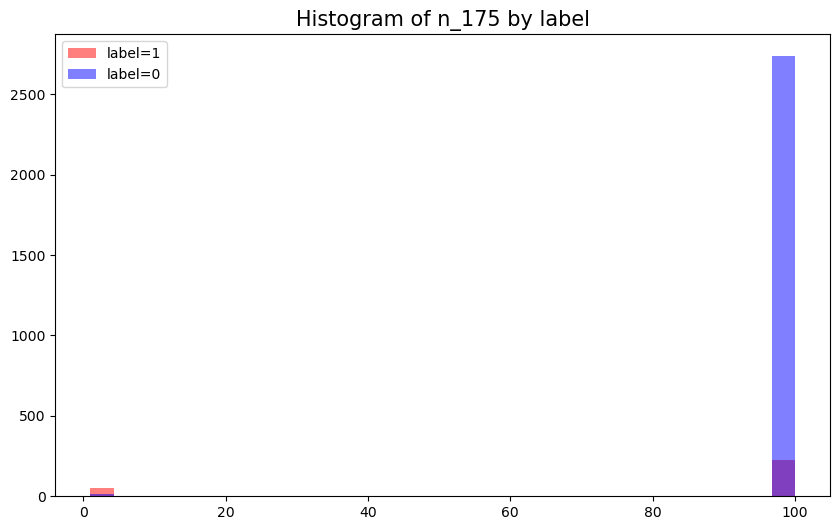

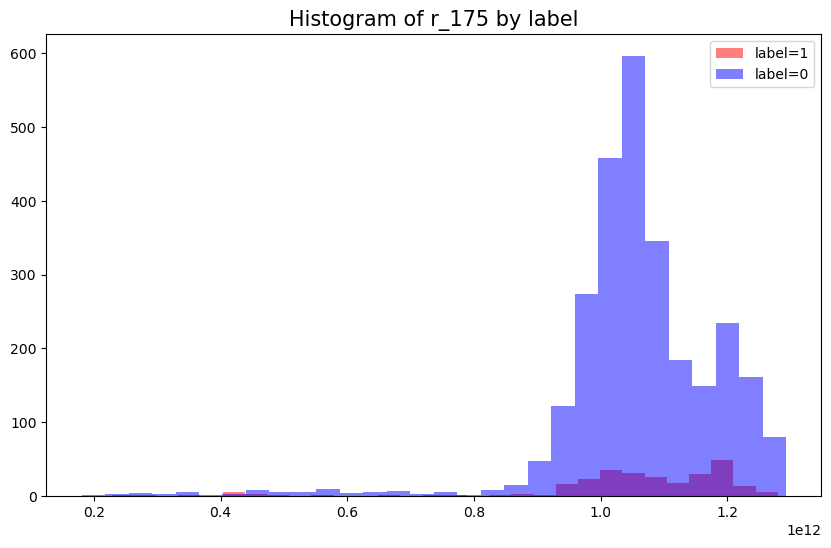

In [18]:
import numpy as np

# 'label' 컬럼을 제외한 피처들만 선택합니다.
features = [col for col in features_data.columns if col != 'label']

# 라벨 0과 1에 대해 같은 수의 샘플을 무작위로 선택합니다.
# 여기서는 라벨 1의 데이터 수를 기준으로 합니다.
n_samples = features_data[features_data['label'] == 1].shape[0]
label0_data = features_data[features_data['label'] == 0].sample(n_samples*10)
label1_data = features_data[features_data['label'] == 1]

for feature in features:
    plt.figure(figsize=(10, 6))
    
    # label=1인 데이터의 히스토그램 그리기 
    plt.hist(label1_data[feature].dropna(), color='r', alpha=0.5, bins=30)
    
    # label=0인 데이터의 히스토그램 그리기 
    plt.hist(label0_data[feature].dropna(), color='b', alpha=0.5, bins=30)
    
    plt.title('Histogram of ' + feature + ' by label', fontsize=15)
    plt.legend(['label=1', 'label=0'])
    plt.show()